## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.utils
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Data Loading

In [2]:
control_data = pd.read_csv('data/control_data.csv')
experiment_data = pd.read_csv('data/experiment_data.csv')

In [3]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [4]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


## Exploratory Data Analysis

In [5]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [6]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [7]:
control_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

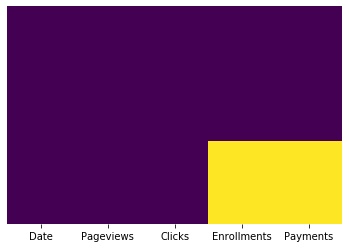

In [8]:
sns.heatmap(control_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

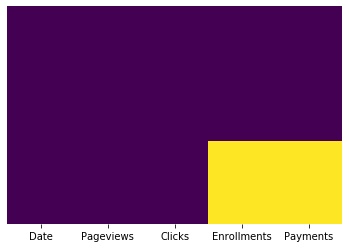

In [10]:
sns.heatmap(experiment_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


## Data Wrangling

In [12]:
# Combine with Experiment data
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
3,"Tue, Oct 14",9867,827,138.0,92.0
13,"Fri, Oct 24",9434,673,220.0,122.0
29,"Sun, Nov 9",9697,850,NaN,NaN
14,"Sat, Oct 25",8669,669,127.0,81.0
24,"Tue, Nov 4",9420,781,NaN,NaN
32,"Wed, Nov 12",10042,802,NaN,NaN
17,"Tue, Oct 28",9363,736,154.0,91.0
15,"Sun, Oct 26",8881,693,153.0,101.0
9,"Mon, Oct 20",10496,860,153.0,98.0
27,"Fri, Nov 7",9424,781,NaN,NaN


In [13]:
np.random.seed(7)

# Add row id
data_total['row_id'] = data_total.index

# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)

# Remove missing data
data_total.dropna(inplace=True)

# Add a binary column Experiment to denote
# if the data was part of the experiment or not (Random)
data_total['Experiment'] = np.random.randint(2, size=len(data_total))

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date and Payments columns
del data_total['Date'], data_total['Payments']

# Shuffle the data(to do random permutations of the collections)
data_total = sklearn.utils.shuffle(data_total)

In [14]:
# Check the new data
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


In [15]:
# Reorder the columns
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]
data_total.head()

,row_id,Experiment,Pageviews,Clicks,DOW,Enrollments
21,21,0,8460,681,Sat,156.0
3,3,1,9867,827,Tue,138.0
21,21,0,8448,695,Sat,142.0
13,13,1,9434,673,Fri,220.0
6,6,1,9008,748,Fri,146.0


In [16]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],
                                                    data_total['Enrollments'], test_size=0.2)

In [17]:
# Converting strings to numbers
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [18]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9535,759,1
10,10,1,10551,864,5
2,2,0,10480,884,1
3,3,1,9867,827,5
16,16,0,9655,771,1


In [19]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


## Helper functions
- Function for printing the evaluation scores related to a _regression_ problem
- Function for plotting the original values and values predicted by the model

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [21]:
plt.style.use('ggplot')
def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

## Model 01: Linear regression: A baseline

In [22]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [23]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [24]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.988871314039862
R2_Squared: 0.050950018270392916
MAE Score: 19.586061838775095


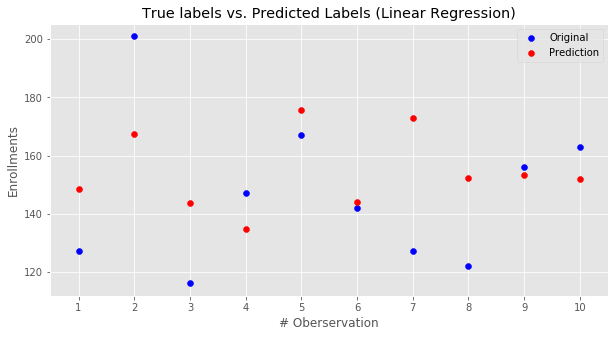

In [25]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [26]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              400.1
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    7.92e-27
Time:                        16:27:12   Log-Likelihood:                         -163.65
No. Observations:                  36   AIC:                                      335.3
Df Residuals:                      32   BIC:                                      341.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,1.974764e-07
2,Clicks,3.804647e-05
3,DOW,2.299762e-01
0,Experiment,8.634578e-01


## Model 02: Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


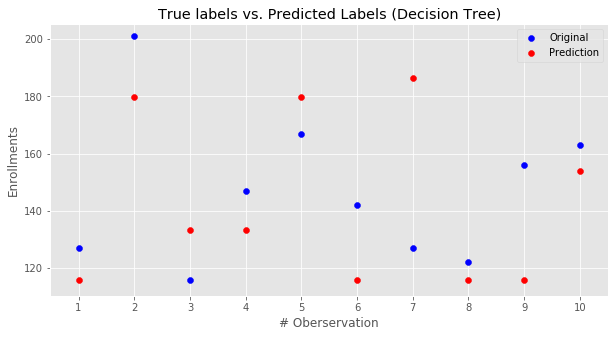

In [29]:
plot_preds(y_test, y_preds, 'Decision Tree')

## Model 03: `XGBoost`

In [30]:
from xgboost import XGBRegressor

In [31]:
X_train['Enrollments'] = y_train
X_test['Enrollments'] = y_test

In [32]:
xgbr = XGBRegressor(learning_rate=0.01,
                    n_estimators=6000,
                    max_depth=4,
                    min_child_weight=0,
                    gamma=0.6,
                    subsample=0.7,
                    colsample_bytree=0.7,
                    objective='reg:linear',
                    nthread=-1,
                    scale_pos_weight=1,
                    seed=27,
                    reg_alpha=0.00006,
                    random_state=42,
                    verbosity = 0)

xg_reg = xgbr.fit(X_train,y_train)
y_preds = xg_reg.predict(X_test)

In [33]:
calculate_metrics(y_test, y_preds)

RMSE Score: 5.053887753834979
R2_Squared: 0.9578768694696828
MAE Score: 4.352651977539063


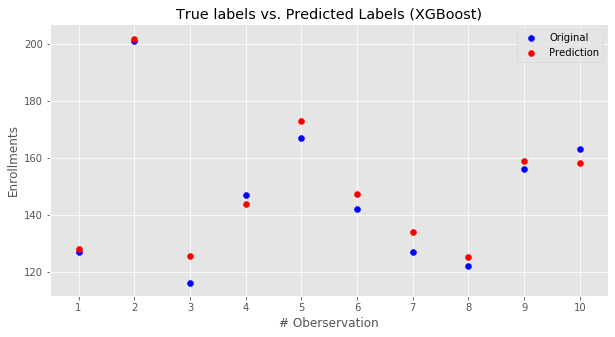

In [34]:
plot_preds(y_test, y_preds, 'XGBoost')

## Model 04: Catboost

In [35]:
from catboost import CatBoostRegressor

In [36]:
X_train['Enrollments'] = y_train
X_test['Enrollments'] = y_test

In [37]:
cb = CatBoostRegressor(silent = True)
model_cb = cb.fit(X_train,y_train)
y_preds = model_cb.predict(X_test)

In [38]:
calculate_metrics(y_test, y_preds)

RMSE Score: 8.063639651353093
R2_Squared: 0.892766204190788
MAE Score: 7.028243050542935


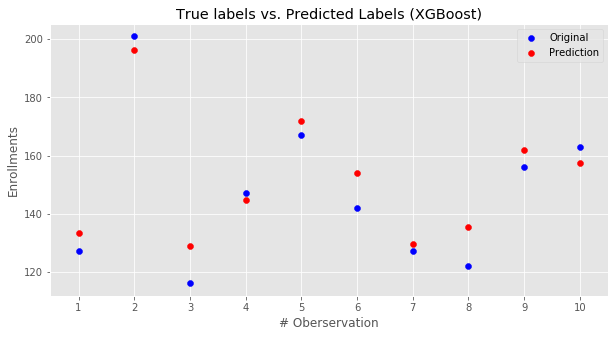

In [39]:
plot_preds(y_test, y_preds, 'XGBoost')

> **XGBoost Wins!**